這次的作業，我上完老師所說的內容，有比較明確。但還是有上網看youtube影片。
https://www.youtube.com/watch?v=shs0KM3wKv8


下面是我針對這次作業畫的流程圖

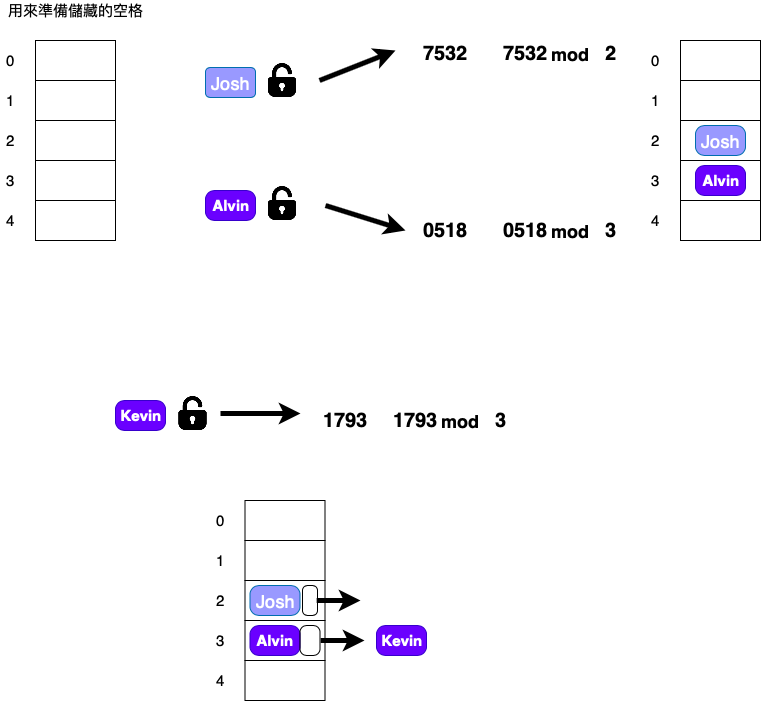

In [1]:
from IPython.display import Image
Image(filename="/Users/chouhsinte/Downloads/hash table.png")

Hash function
老師提過好像每個人的身分證字號，具有唯一性。
性質：
1. 運算速度快
2. 不可逆性：無法從雜湊值推回原本的資料是什麼
3. 如果兩個雜湊值是不相同的（根據同一函式），那麼這兩個雜湊值的原始輸入也是不相同的。
4. 如果兩個雜湊值是相同的（根據同一函式），那麼這兩個雜湊值的原始輸入不一定是相同的。
5. 即便輸入非常大的數據（key長度不同），輸出數值的長度都一樣長。



Hash table
在用雜湊函數運算出來的雜湊值，根據鍵 (key) 來儲存在數據結構中。而存放這些記錄的數組即為Hash Table。
主要的功能就是加快搜尋速度。
使用方式：輸入一段文字後去進行轉換，會發現去除於某一個數的餘數，那個餘數即為第幾組。
上網查到還有其他種用法如下
1.	除法(Division) （這個是我們所學的方式）
2.	平方取中法(Mid-Square)
3.	折疊法(Folding)
4.	抽取法(Extraction)
5.	乘法(Mutiplication)
6.	基數法(Radix Method)
7.	位數分析法(Digit Analysis)




以下為我開始試打後，所遇到的第一個比較大問題。

In [2]:
from Cryptodome.Hash import MD5

class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
        """
        :type val: int
        :type next: ListNode
        :rtype: None        
        """
class MyHashSet:
    def __init__(self, capacity):
        self.capacity = capacity
        self.data = [None] * capacity
        """
        :type capacity: int
        :rtype: None
        """
    def add(self, key):
        """
        :type key: int
        :rtype: None
        """
        key_MD5 = self.MyCryptoMD5(key)
       # print(key_MD5)

        key_bucket = key_MD5 % (self.capacity)
        #print(key + " bucket(add): ")
        #print (self.data[key_bucket])

        if self.data[key_bucket] is None:
            self.data[key_bucket] = ListNode(key_MD5)
            #print (self.data[key_bucket])
        elif self.data[key_bucket].val!= key_MD5:
            while self.data[key_bucket].next is not None:
                if self.data[key_bucket].next.val == key_MD5:
                    print("this key is duplicated")
                    break
                else:
                    self.data[key_bucket] = self.data[key_bucket].next
            self.data[key_bucket].next = ListNode(key_MD5)
        else:
            print("this key is duplicated")

    def remove(self, key):
        """
        :type key: int
        :rtype: None
        """
        key_MD5 = self.MyCryptoMD5(key)
        key_bucket = key_MD5 % (self.capacity)
        pre = None
        while self.data[key_bucket]:
            if self.data[key_bucket].val == key_MD5:
                if pre is None:
                    self.data[key_bucket] = self.data[key_bucket].next
                else:
                    pre.next = self.data[key_bucket].next
                    del(self.data[key_bucket])
                    if(self.contain(key)):
                        self.remove(key)
                    else:
                        break
            else:
                pre = self.data[key_bucket]
                self.data[key_bucket] = self.data[key_bucket].next
    def contains(self, key):
        """
        :type key: int
        :rtype: bool(True or False)
        """
        key_MD5 = self.MyCryptoMD5(key)
        key_bucket = key_MD5 % (self.capacity)
        while self.data[key_bucket] is not None:
            if self.data[key_bucket].val == key_MD5:
                return True
            self.data[key_bucket] = self.data[key_bucket].next
        return False
    def MyCryptoMD5(self, key):
        h=MD5.new(key)
        h.update(key.encode("utf-8"))
        '''print(h.hexdigest())
        print(int(h.hexdigest(), 16))'''
        return int(h.hexdigest(), 16)

hashSet = MyHashSet(3)
hashSet.add("dog")
hashSet.add("pig")
print(hashSet.contains("pig"))
print(hashSet.contains("dog"))
print(hashSet.contains("bird"))
hashSet.add("bird")
print(hashSet.contains("bird"))
hashSet.remove("bird")
print(hashSet.contains("bird"))




TypeError: Object type <class 'str'> cannot be passed to C code

上面是我遇到的問題，因為我沒有使用到cur= self.data[key_bucket]這個用法，所以就面臨到很多東西被取代。如下圖

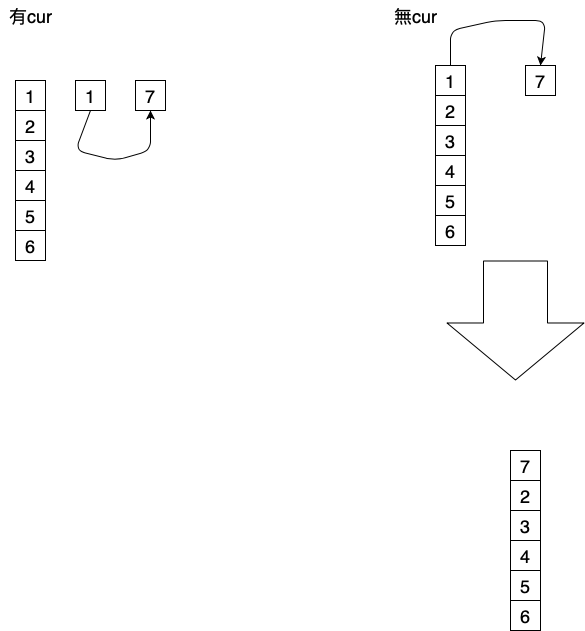

In [3]:
from IPython.display import Image
Image(filename="/Users/chouhsinte/Downloads/cur error .png")

易錯觀念
cur VS cur.val
cur 是指那整個位置
cur.val是指只有那個值

在過程中我誤以為不用多用cur=self.data[key_bucket]就可以單靠self.data[key_bucket]就可以完成全部。
add remove contain這三個功能皆需要分別來看。如上圖一樣。

In [ ]:
from Cryptodome.Hash import MD5

class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
        """
        :type val: int
        :type next: ListNode
        :rtype: None        
        """
class MyHashSet:
    def __init__(self, capacity = 5):
        self.capacity = capacity
        self.data = [None] * capacity
        """
        :type capacity: int
        :rtype: None
        """
    def add(self, key):
        """
        :type key: int
        :rtype: None
        """
        key_MD5 = self.MyCryptoMD5(key)#加密後的數字
        key_bucket=key_MD5%(self.capacity)#加密後的數字去除空間取餘數，才知道要放在哪。
        if self.data[key_bucket] is None:#其中一格是空的情況下，去跑迴圈
            self.data[key_bucket] = ListNode(key_MD5)#是空的情況下就可以加上去
        elif self.data[key_bucket].val != key_MD5:#裡面的值要不等於加密後的數值才可以繼續
            cur = self.data[key_bucket]#在使一個游標指向key_bucket
            while cur.next is not None:
                if cur.next.val == key_MD5:
                    print("this key is duplicated")
                    return None
                else:
                    cur=cur.next
            cur.next = ListNode(key_MD5)
        else:
            print("this key is duplicated")
                     
    def remove(self, key):
        """
        :type key: int
        :rtype: None
        """
        key_MD5 = self.MyCryptoMD5(key)
        key_bucket = key_MD5 % (self.capacity)
        cur = self.data[key_bucket]
        pre = None
        while cur is not None: #cur必須為空才會執行
            if cur.val ==key_MD5: #找到符合的值才會執行接下來的動作
                if pre is None:#我採用的方式只是讓他們鍵結移動改變，並未真正刪除記憶體位置
                    self.data[key_bucket]=cur.next
                else:
                    pre = cur.next
                break
            else:
                pre = cur
                cur=cur.next
                    

    def contains(self, key):
        """
        :type key: int
        :rtype: bool(True or False)
        """
        key_MD5= self.MyCryptoMD5(key)
        key_bucket= key_MD5%(self.capacity)
        cur = self.data[key_bucket]
        while cur is not None:
            if cur.val == key_MD5:#值一樣就回傳True
                return True
            cur=cur.next#沒有的話就往下一個
        return False #到最後都沒有就回傳出False   
        
        
    def MyCryptoMD5(self, key):
        h=MD5.new()
        h.update(key.encode("utf-8"))
        h.hexdigest()
        int(h.hexdigest(), 16)
        return int(h.hexdigest(), 16)#16進位轉10進位




我在測試的時候發現了一個很奇妙的現象，就是呢，我執行remove這個動作。會發生其中一項未刪除，其他則是都有刪除。

我請06170501厲彥伯同學幫我debug，發現第55行pre=cur.next，應修改為pre.next=cur.next

In [ ]:
from Cryptodome.Hash import MD5

class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
        """
        :type val: int
        :type next: ListNode
        :rtype: None        
        """
class MyHashSet:
    def __init__(self, capacity = 5):
        self.capacity = capacity
        self.data = [None] * capacity
        """
        :type capacity: int
        :rtype: None
        """
    def add(self, key):
        """
        :type key: int
        :rtype: None
        """
        key_MD5 = self.MyCryptoMD5(key)#加密後的數字
        key_bucket=key_MD5%(self.capacity)#加密後的數字去除空間取餘數，才知道要放在哪。
        if self.data[key_bucket] is None:#其中一格是空的情況下，去跑迴圈
            self.data[key_bucket] = ListNode(key_MD5)#是空的情況下就可以加上去
        elif self.data[key_bucket].val != key_MD5:#裡面的值要不等於加密後的數值才可以繼續
            cur = self.data[key_bucket]#在使一個游標指向key_bucket
            while cur.next is not None:
                if cur.next.val == key_MD5:
                    print("this key is duplicated")
                    return None
                else:
                    cur=cur.next
            cur.next = ListNode(key_MD5)
        else:
            print("this key is duplicated")
                     
    def remove(self, key):
        """
        :type key: int
        :rtype: None
        """
        key_MD5 = self.MyCryptoMD5(key)
        key_bucket = key_MD5 % (self.capacity)
        cur = self.data[key_bucket]
        pre = None
        while cur is not None: #cur必須為空才會執行
            if cur.val ==key_MD5: #找到符合的值才會執行接下來的動作
                if pre is None:#我採用的方式只是讓他們鍵結移動改變，並未真正刪除記憶體位置
                    self.data[key_bucket]=cur.next
                else:
                    pre.next = cur.next
                break
            else:
                pre = cur
                cur=cur.next
                    

    def contains(self, key):
        """
        :type key: int
        :rtype: bool(True or False)
        """
        key_MD5= self.MyCryptoMD5(key)
        key_bucket= key_MD5%(self.capacity)
        cur = self.data[key_bucket]
        while cur is not None:
            if cur.val == key_MD5:#值一樣就回傳True
                return True
            cur=cur.next#沒有的話就往下一個
        return False #到最後都沒有就回傳出False   
        
        
    def MyCryptoMD5(self, key):
        h=MD5.new()
        h.update(key.encode("utf-8"))
        h.hexdigest()
        int(h.hexdigest(), 16)
        return int(h.hexdigest(), 16)#16進位轉10進位




感想：這次作業相較於上次作業比較起來有明顯地較簡單，也許是因為打了幾次作業的關係了。我發現自己好像可以將程式碼慢慢打出來，雖然還是沒辦法一次就對，也還是需要請教別人。可能還需要一段時間。故從我錯誤內容可得知，我是自己撰寫然後有錯去修正的。故本次作業本人只有請問別人錯哪裡，並無抄襲任何人作品。

參考資料：https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=3&ved=2ahUKEwjn0I-4857mAhXVy4sBHdMrAaUQFjACegQIBxAC&url=http%3A%2F%2Fcc.cust.edu.tw%2F~ven%2Fmis1%2Fch11.ppt&usg=AOvVaw1xXbtfbSepZw3w2_1X3Qj1
https://ithelp.ithome.com.tw/articles/10208884
http://alrightchiu.github.io/SecondRound/hash-tableintrojian-jie.html